In [1]:
import warnings
warnings.filterwarnings("ignore")

#### Import the useful Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

#### Importing Data from CSV

In [3]:
# Reading the data from CSV file

uber_data = pd.read_csv("Uber Request Data.csv")

In [4]:
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


Inference 1: 'Driver Id' fields have decimal values however it should be integer value.

Inference 2: 'Request timestamp' and 'Drop timestamp' fields have different formats however it should be in same format eg '15-07-2016 23:43:54'.

In [5]:
# Check the number of rows and columns in the dataset

uber_data.shape

(6745, 6)

In [6]:
# Check the columnwise info of the dataset

uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 210.8+ KB


In [7]:
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Inference 3: 'Driver Id' and 'Drop timestamp' has many 'Null' values

### Summary of first in glance Inspecting of the dataframe
    * 'Driver Id' fields have decimal values however it should be integer value.
    *'Request timestamp' and 'Drop timestamp' fields have different formats however it should be in same format eg '15-07-2016 23:43:54'.
    * 'Driver Id' and 'Drop timestamp' has many 'Null' values
    

# Data Cleaning

In [8]:
# Creating a small dataframe to understand the number of drivers and the trip they complete daily

demand_vs_supply = pd.DataFrame({'Total No. Of Drivers':[uber_data['Driver id'].nunique()],
                                'Total Demand Per Day':[uber_data['Request id'].nunique()/5],
                                'Trip_Completed_Per_Day':uber_data[(uber_data['Status']=='Trip Completed')].shape[0]/5})

demand_vs_supply

,Total Demand Per Day,Total No. Of Drivers,Trip_Completed_Per_Day
0,1349.0,300,566.2


In [9]:
# On an avarage how many requests each driver gets

demand_vs_supply['Total Demand Per Day']/demand_vs_supply['Total No. Of Drivers']

0    4.496667
dtype: float64

#### Converting 'Request timestamp' and 'Drop timestamp' field to uniform format

In [10]:
# Formatting the 'Request timestamp' and the 'Drop timestamp'

uber_data["Request timestamp"] = pd.to_datetime(uber_data["Request timestamp"], dayfirst=True)
uber_data["Drop timestamp"] = pd.to_datetime(uber_data["Drop timestamp"], dayfirst=True)

In [11]:
# Printing the first few rows of the formatted data

uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [12]:
# Spliting the date and time and adding some rows for further analysis

uber_data['Request Date'] = uber_data['Request timestamp'].dt.date
uber_data['Request Time'] = uber_data['Request timestamp'].dt.time
uber_data['Drop Date'] = uber_data['Drop timestamp'].dt.date
uber_data['Drop Time'] = uber_data['Drop timestamp'].dt.time
uber_data['Request Weekday'] = uber_data['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
uber_data['Request Hour'] = uber_data['Request timestamp'].apply(lambda x: x.hour)
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8


In [13]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8


### Making a derived calumn 'Duration'

In [14]:
uber_data['Duration'] = uber_data['Drop timestamp']-uber_data['Request timestamp']

uber_data['Duration'] = round(uber_data['Duration'].dt.total_seconds()/60,1)

In [15]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8,52.5


## Identifying additional data quality issue

In [16]:
# Counting the null values in the dataframe

Count_of_Null_Values_Request_Timestamp = uber_data['Request timestamp'].isnull().sum()
Count_of_Null_Values_Drop_Timestamp = uber_data['Drop timestamp'].isnull().sum()
Count_of_Null_Values_Driver_id = uber_data['Driver id'].isnull().sum()
print("Number of Rows containing Null Values in Request Timestamp:", Count_of_Null_Values_Request_Timestamp)
print("Number of Rows containing Null Values in Drop Timestamp:", Count_of_Null_Values_Drop_Timestamp)
print("Number of Rows containing Null Values in Driver Id:", Count_of_Null_Values_Driver_id)

Number of Rows containing Null Values in Request Timestamp: 0
Number of Rows containing Null Values in Drop Timestamp: 3914
Number of Rows containing Null Values in Driver Id: 2650


In [17]:
# Grouping the data by status and counting the number of request ids for each status type

uber_data.groupby(uber_data.Status).count()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
Status,,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,1264,0,1264,1264,0,0,1264,1264,0
No Cars Available,2650,2650,0,2650,2650,0,2650,2650,0,0,2650,2650,0
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


## Checking the date range

In [18]:
# Checking the range of the data

print("Minimum Date:", min(uber_data['Request Date']))
print("Maximum Date:", max(uber_data['Request Date']))

Minimum Date: 2016-07-11
Maximum Date: 2016-07-15


In [19]:
# Printing all unique dates

print(uber_data['Request Date'].unique())

[datetime.date(2016, 7, 11) datetime.date(2016, 7, 12)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]


In [20]:
# Grouping by driver id and stutus type and printing top 10 rows

uber_data_groupby_status_and_driverID = uber_data.groupby(['Driver id', 'Status']).count()
uber_data_groupby_status_and_driverID.head(10)

Request id  Pickup point  Request timestamp  \
Driver id Status                                                        
1.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
2.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
3.0       Cancelled                4             4                  4   
          Trip Completed          10            10                 10   
4.0       Cancelled                5             5                  5   
          Trip Completed          10            10                 10   
5.0       Cancelled                2             2                  2   
          Trip Completed          11            11                 11   

                          Drop timestamp  Request Date  Request Time  \
Driver id Status                                                       
1.0       Cancelled                    0             4             4   
          Trip Completed               9             9             9   
2.0       Cancelled                    0             4             4   
          Trip Completed               9             9             9   
3.0       Cancelled                    0             4             4   
          Trip Completed              10            10            10   
4.0       Cancelled                    0             5             5   
          Trip Completed              10            10            10   
5.0       Cancelled                    0             2             2   
          Trip Completed              11            11            11   

                          Drop Date  Drop Time  Request Weekday  Request Hour  \
Driver id Status                                                                
1.0       Cancelled               0          0                4             4   
          Trip Completed          9          9                9             9   
2.0       Cancelled               0          0                4             4   
          Trip Completed          9          9                9             9   
3.0       Cancelled               0          0                4             4   
          Trip Completed         10         10               10            10   
4.0       Cancelled               0          0                5             5   
          Trip Completed         10         10               10            10   
5.0       Cancelled               0          0                2             2   
          Trip Completed         11         11               11            11   

                          Duration  
Driver id Status                    
1.0       Cancelled              0  
          Trip Completed         9  
2.0       Cancelled              0  
          Trip Completed         9  
3.0       Cancelled              0  
          Trip Completed        10  
4.0       Cancelled              0  
          Trip Completed        10  
5.0       Cancelled              0  
          Trip Completed        11

In [21]:
# Filtering the dataframe by either cancelled or no car available

uber_data_with_null_drop_timestamp = uber_data[uber_data['Drop timestamp'].isnull()]
uber_data_with_null_drop_timestamp.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,NaN,NaN,Wednesday,6,NaN
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,NaN,NaN,Thursday,17,NaN
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,NaN,NaN,Thursday,20,NaN
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,NaN,NaN,Friday,10,NaN
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19:14:00,NaN,NaN,Tuesday,19,NaN


In [22]:
# Grouping the above by each status type and printing it

uber_data_with_null_drop_timestamp.groupby(uber_data_with_null_drop_timestamp.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,0,0,1264,1264,0
No Cars Available,2650,2650,0,2650,0,2650,2650,0,0,2650,2650,0


In [23]:
# Filtering dataframe for which the trip was completed

uber_data_with_drop_timestamp = uber_data[~uber_data["Drop timestamp"].isnull()]
uber_data_with_drop_timestamp.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8,52.5


In [24]:
#Grouping by status type to check count

uber_data_with_drop_timestamp.groupby(uber_data_with_drop_timestamp.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
Status,,,,,,,,,,,,
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [25]:
# Filtering dataframe for the request where there is no car available

uber_data_with_no_driver_id = uber_data[uber_data["Driver id"].isnull()]
uber_data_with_no_driver_id.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT,2016-07-11,00:02:00,NaN,NaN,Monday,0,NaN
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT,2016-07-11,00:06:00,NaN,NaN,Monday,0,NaN
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT,2016-07-11,00:09:00,NaN,NaN,Monday,0,NaN
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT,2016-07-11,00:23:00,NaN,NaN,Monday,0,NaN
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT,2016-07-11,00:30:00,NaN,NaN,Monday,0,NaN


In [26]:
# Filtering dataframe only with driver id, so either the trip was completed or cancelled

uber_data_with_driver_id = uber_data[~uber_data["Driver id"].isnull()]
uber_data_with_driver_id.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8,52.5


In [27]:
# Grouping the dataframe by status to check the total count of trip completed and cancelled

uber_data_with_driver_id.groupby(uber_data_with_driver_id.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,0,0,1264,1264,0
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [28]:
print("Number of rows with driver id but no Drop timestamp:", uber_data_with_driver_id['Drop timestamp'].isnull().sum())

Number of rows with driver id but no Drop timestamp: 1264


In [29]:
uber_data_with_driver_id_but_no_droptime = uber_data_with_driver_id[uber_data_with_driver_id["Drop timestamp"].isnull()]
uber_data_with_driver_id_but_no_droptime.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,NaN,NaN,Wednesday,6,NaN
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,NaN,NaN,Thursday,17,NaN
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,NaN,NaN,Thursday,20,NaN
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,NaN,NaN,Friday,10,NaN
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19:14:00,NaN,NaN,Tuesday,19,NaN


In [30]:
uber_data_with_driver_id_but_no_droptime.groupby(uber_data_with_driver_id_but_no_droptime.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,0,0,1264,1264,0


In [31]:
uber_data_groupby_request_date = uber_data.groupby(['Request Date', 'Status']).count()
uber_data_groupby_request_date

Request id  Pickup point  Driver id  \
Request Date Status                                                   
2016-07-11   Cancelled                 262           262        262   
             No Cars Available         504           504          0   
             Trip Completed            601           601        601   
2016-07-12   Cancelled                 240           240        240   
             No Cars Available         505           505          0   
             Trip Completed            562           562        562   
2016-07-13   Cancelled                 270           270        270   
             No Cars Available         490           490          0   
             Trip Completed            577           577        577   
2016-07-14   Cancelled                 252           252        252   
             No Cars Available         571           571          0   
             Trip Completed            530           530        530   
2016-07-15   Cancelled                 240           240        240   
             No Cars Available         580           580          0   
             Trip Completed            561           561        561   

                                Request timestamp  Drop timestamp  \
Request Date Status                                                 
2016-07-11   Cancelled                        262               0   
             No Cars Available                504               0   
             Trip Completed                   601             601   
2016-07-12   Cancelled                        240               0   
             No Cars Available                505               0   
             Trip Completed                   562             562   
2016-07-13   Cancelled                        270               0   
             No Cars Available                490               0   
             Trip Completed                   577             577   
2016-07-14   Cancelled                        252               0   
             No Cars Available                571               0   
             Trip Completed                   530             530   
2016-07-15   Cancelled                        240               0   
             No Cars Available                580               0   
             Trip Completed                   561             561   

                                Request Time  Drop Date  Drop Time  \
Request Date Status                                                  
2016-07-11   Cancelled                   262          0          0   
             No Cars Available           504          0          0   
             Trip Completed              601        601        601   
2016-07-12   Cancelled                   240          0          0   
             No Cars Available           505          0          0   
             Trip Completed              562        562        562   
2016-07-13   Cancelled                   270          0          0   
             No Cars Available           490          0          0   
             Trip Completed              577        577        577   
2016-07-14   Cancelled                   252          0          0   
             No Cars Available           571          0          0   
             Trip Completed              530        530        530   
2016-07-15   Cancelled                   240          0          0   
             No Cars Available           580          0          0   
             Trip Completed              561        561        561   

                                Request Weekday  Request Hour  Duration  
Request Date Status                                                      
2016-07-11   Cancelled                      262           262         0  
             No Cars Available              504           504         0  
             Trip Completed                 601           601       601  
2016-07-12   Cancelled                      240           240         0  
             No

In [32]:
x = uber_data.groupby('Request Date').count()
x.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration
Request Date,,,,,,,,,,,,
2016-07-11,1367,1367,863,1367,1367,601,1367,601,601,1367,1367,601
2016-07-12,1307,1307,802,1307,1307,562,1307,562,562,1307,1307,562
2016-07-13,1337,1337,847,1337,1337,577,1337,577,577,1337,1337,577
2016-07-14,1353,1353,782,1353,1353,530,1353,530,530,1353,1353,530
2016-07-15,1381,1381,801,1381,1381,561,1381,561,561,1381,1381,561


### Creating a new column called 'Slot'

In [33]:
# Creating a function to determine the ride slot on basis of 'Request timestamp'
def get_slot(rt):
    if rt in range(4,6):
        return 'Early Morning'
    if rt in range(6,12):
        return 'Morning'
    if rt in range(12,17):
        return 'Afternoon'
    if rt in range(17,20):
        return 'Evening'
    if rt in range(20,24):
        return 'Night'
    if rt in range(0,4):
        return 'Late Night'

uber_data['Slot'] = uber_data['Request timestamp'].dt.hour.apply(lambda x: get_slot(x))

In [34]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour,Duration,Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11,69.0,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17,50.0,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9,41.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21,55.0,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8,52.5,Morning


## Data Visualization

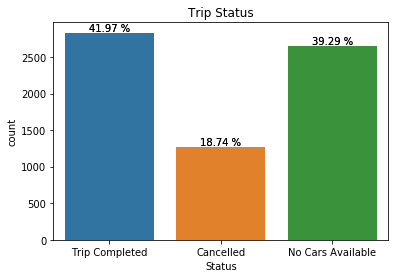

In [35]:
# Plotting graphs for trip status

plt.title('Trip Status')
sns.countplot(uber_data['Status'])
ax =sns.countplot(x='Status', data=uber_data)
total = len(uber_data)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+25
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

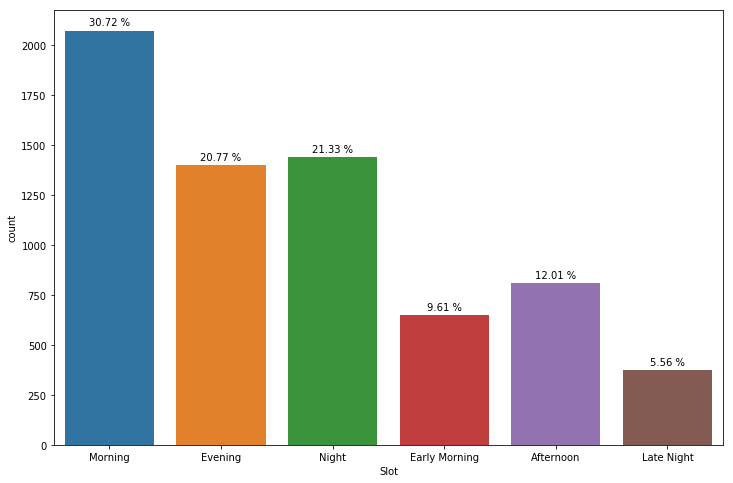

In [36]:
#looking for insight in request timeslot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='b')
ax =sns.countplot(x='Slot', data=uber_data)
total = len(uber_data)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+25
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

#### Observations:
* From the above plot it is clear that most of the requests are raised in morning(30.72%) and night(21.33%) slots, high request rates are from 6am to 12am and 8pm to 12pm.

### Finding the gap between demand and supply and show the same with plot.

In [37]:
# Computing overall Demand-Supply gap
# Count of Total Trip Requested

print('Count of Total Trip Requested')
total_trip_count = uber_data['Request id'].count()
print(total_trip_count)
# Count of Completed Trip
print('Count of Completed Trip')
print(uber_data[uber_data['Status']=='Trip Completed']['Request id'].count())
# Percent of Completed Trip
print('Percent of Completed Trip')
print(round(100*uber_data[uber_data['Status']=='Trip Completed']['Request id'].count()/total_trip_count),2)
# Count of Trip that did not happened
print('Count of Trip that did not happened')
print(uber_data[uber_data['Status']!='Trip Completed']['Request id'].count())
# Percent of Trip that did not happened
print('Percent of Trip that did not happened')
print(round(100*uber_data[uber_data['Status']!='Trip Completed']['Request id'].count()/total_trip_count),2)

Count of Total Trip Requested
6745
Count of Completed Trip
2831
Percent of Completed Trip
42.0 2
Count of Trip that did not happened
3914
Percent of Trip that did not happened
58.0 2


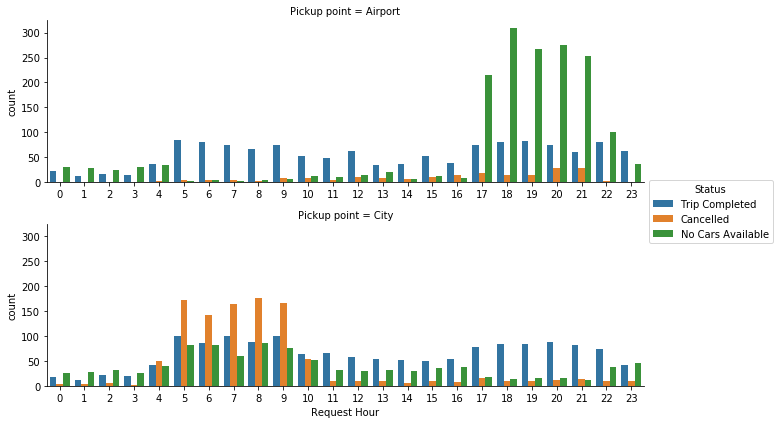

In [38]:
# Using factorplot since we have to visualize the spread of count of trips broken down by status of trip and pickup point
# factor plot of hour w.r.t. status for different pickup points; All trips
sns.factorplot(data = uber_data, x = "Request Hour", hue = "Status", row = "Pickup point", kind = "count", size=3, aspect=3)
plt.show()

### Supply and demand gap calculation

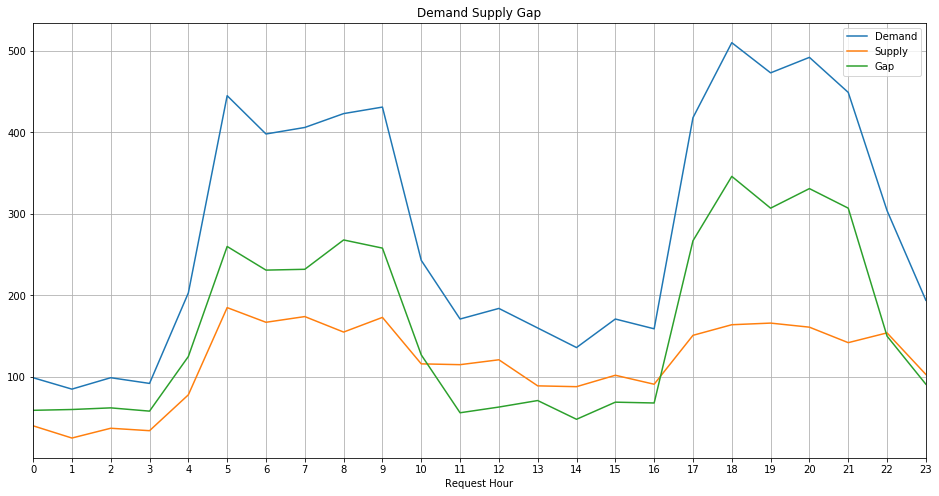

In [39]:
# Plot to show the demand supply gap

fig, ax = plt.subplots(figsize=(16,8))
plt.xticks([i for i in range(0,24)])
uber_data.groupby(uber_data['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
uber_data[uber_data['Status']=="Trip Completed"].groupby(uber_data[uber_data['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(uber_data.groupby(uber_data['Request Hour']).count()['Request id'] - uber_data[uber_data['Status']=="Trip Completed"].groupby(uber_data[uber_data['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap')
plt.grid("on")
plt.title("Demand Supply Gap")
plt.legend()
plt.show()

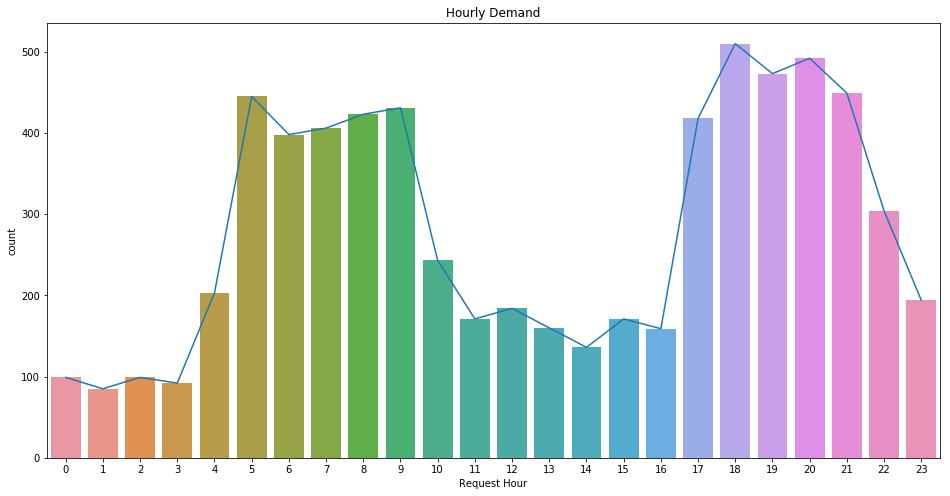

In [40]:
# Plot the data to show hourly distribution of request

fig, ax = plt.subplots(figsize=(16,8))
plt.title("Hourly Demand")
uber_data.groupby(uber_data['Request Hour']).count()['Request id'].plot(ax=ax)
sns.countplot(uber_data['Request Hour'])
plt.show()

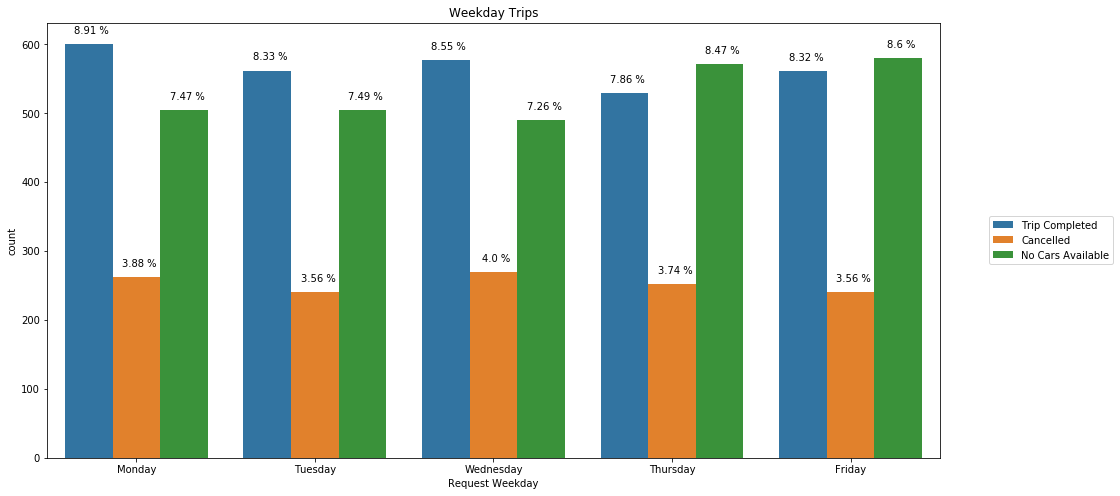

In [41]:
# Plot data to show status count of each day

fig, ax = plt.subplots(figsize=(16,8))
plt.title("Weekday Trips")
ax = sns.countplot(data=uber_data, x= 'Request Weekday', hue ='Status')
total = len(uber_data)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.15
    Y = p.get_height()+15
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='right')
plt.show()

In [42]:
uber_data_heat = uber_data.groupby(['Request Weekday', 'Request Hour']).size().reset_index()
uber_data_heat.columns = ['Request Weekday', 'Request Hour', 'Hourly Count']
uber_data_heat.head()

,Request Weekday,Request Hour,Hourly Count
0,Friday,0,21
1,Friday,1,19
2,Friday,2,21
3,Friday,3,19
4,Friday,4,37


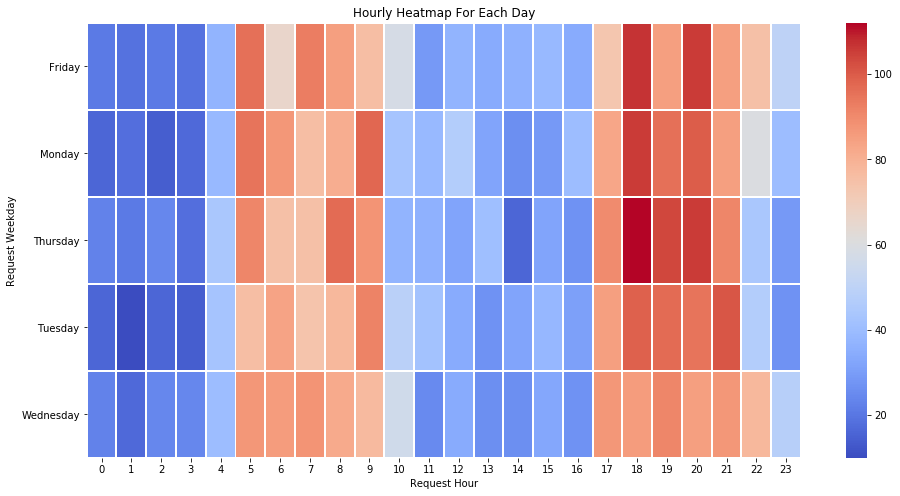

In [43]:
# Plot data to show hourly request heatmap

fig, ax = plt.subplots(figsize=(16,8))
plt.title("Hourly Heatmap For Each Day")
sns.heatmap(uber_data_heat.pivot('Request Weekday', 'Request Hour', 'Hourly Count'), linewidths=1, cmap="coolwarm")
plt.yticks(rotation=0)
plt.show()

In [44]:
uber_data_city = uber_data[uber_data['Pickup point']=='City']
uber_data_airport = uber_data[uber_data['Pickup point']=='Airport']

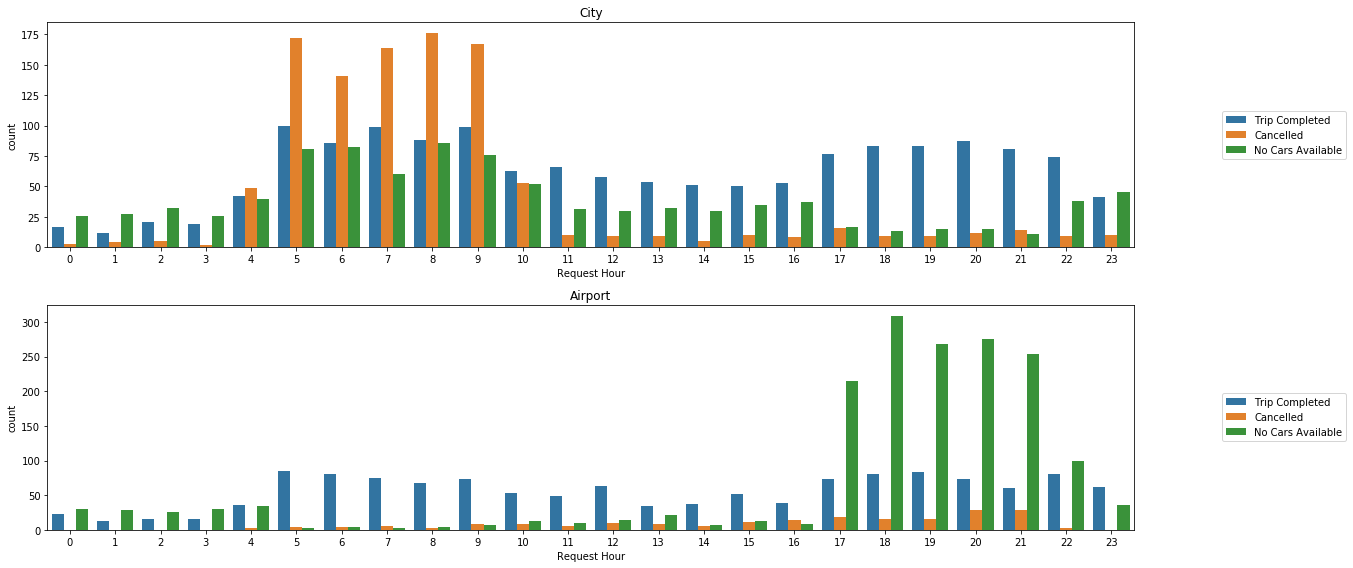

In [45]:
# Plot data to get count of status for airport to city and city to airport trips

f = plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title("City")
sns.countplot(data=uber_data_city, x='Request Hour', hue='Status')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='right')
plt.subplot(2,1,2)
plt.title("Airport")
sns.countplot(data=uber_data_airport, x='Request Hour', hue='Status')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='right')
plt.tight_layout()

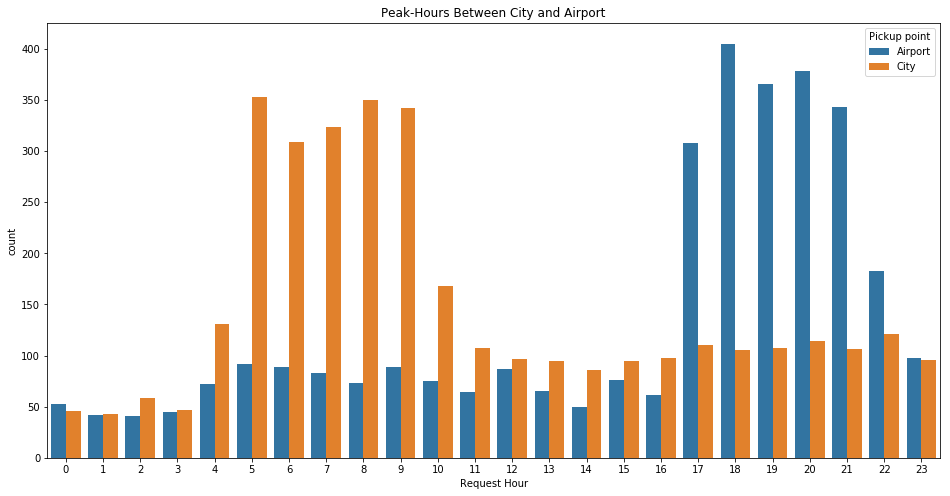

In [46]:
# Plot hourly data to visualize peakhours from city to airport and airport to city trips

plt.subplots(figsize=(16,8))
plt.title("Peak-Hours Between City and Airport")
sns.countplot(data = uber_data, x='Request Hour', hue='Pickup point')
plt.show()

### Dividing data into multiple time slots

In [46]:
# Early morning time slot: 04:00:00 to 05:59:59

uber_data_early_morning = pd.DataFrame(uber_data[(uber_data['Request Hour']<4)& (uber_data['Request Hour']<6)]).reset_index()


# Early morning City

uber_data_early_morning_city = uber_data_early_morning[(uber_data_early_morning['Pickup point']=='City')]
uber_data_early_morning_city_perc = (uber_data_early_morning_city.groupby(['Status']).index.count()
                                   /len(uber_data_early_morning_city)*100).reset_index()

# Early morning Airport

uber_data_early_morning_airport = uber_data_early_morning[(uber_data_early_morning['Pickup point']=='Airport')]
uber_data_early_morning_airport_perc = (uber_data_early_morning_airport.groupby(['Status']).index.count()
                                   /len(uber_data_early_morning_airport)*100).reset_index()

In [47]:
# Morning time slot: 06:00:00 to 11:59:59

uber_data_morning = pd.DataFrame(uber_data[(uber_data['Request Hour']>=6) & (uber_data['Request Hour']<12)]).reset_index()

# Morning City

uber_data_morning_city = uber_data_morning[(uber_data_morning['Pickup point']=='City')]
uber_data_morning_city_perc = (uber_data_morning_city.groupby(['Status']).index.count()
                                   /len(uber_data_morning_city)*100).reset_index()

# Morning Airport

uber_data_morning_airport = uber_data_morning[(uber_data_morning['Pickup point']=='Airport')]
uber_data_morning_airport_perc = (uber_data_morning_airport.groupby(['Status']).index.count()
                                   /len(uber_data_morning_airport)*100).reset_index()

In [48]:
# Afternoon time slot: 12:00:00 to 16:59:59

uber_data_afternoon = pd.DataFrame(uber_data[(uber_data['Request Hour']>=12) & (uber_data['Request Hour']<17)]).reset_index()

# Afternoon City

uber_data_afternoon_city = uber_data_afternoon[(uber_data_afternoon['Pickup point']=='City')]
uber_data_afternoon_city_perc = (uber_data_afternoon_city.groupby(['Status']).index.count()
                                   /len(uber_data_afternoon_city)*100).reset_index()

# Afternoon Airport

uber_data_afternoon_airport = uber_data_afternoon[(uber_data_afternoon['Pickup point']=='Airport')]
uber_data_afternoon_airport_perc = (uber_data_afternoon_airport.groupby(['Status']).index.count()
                                   /len(uber_data_afternoon_airport)*100).reset_index()

In [49]:
# Evening time slot: 17:00:00 to 19:59:59

uber_data_evening = pd.DataFrame(uber_data[(uber_data['Request Hour']>=17) & (uber_data['Request Hour']<20)]).reset_index()

# Evening City

uber_data_evening_city = uber_data_evening[(uber_data_evening['Pickup point']=='City')]
uber_data_evening_city_perc = (uber_data_evening.groupby(['Status']).index.count()
                                   /len(uber_data_evening_city)*100).reset_index()

# Evening Airport

uber_data_evening_airport = uber_data_evening[(uber_data_evening['Pickup point']=='Airport')]
uber_data_evening_airport_perc = (uber_data_evening_airport.groupby(['Status']).index.count()
                                   /len(uber_data_evening_airport)*100).reset_index()

In [50]:
# Night time slot: 20:00:00 to 23:59:59

uber_data_night = pd.DataFrame(uber_data[(uber_data['Request Hour']>=20) & (uber_data['Request Hour']<24)]).reset_index()

# Night City

uber_data_night_city = uber_data_night[(uber_data_night['Pickup point']=='City')]
uber_data_night_city_perc = (uber_data_night.groupby(['Status']).index.count()
                                   /len(uber_data_night_city)*100).reset_index()

# Night Airport

uber_data_night_airport = uber_data_night[(uber_data_night['Pickup point']=='Airport')]
uber_data_night_airport_perc = (uber_data_night_airport.groupby(['Status']).index.count()
                                   /len(uber_data_night_airport)*100).reset_index()

In [51]:
# Late Night time slot: 00:00:00 to 03:59:59

uber_data_late_night = pd.DataFrame(uber_data[(uber_data['Request Hour']<4)]).reset_index()

# Late Night City

uber_data_late_night_city = uber_data_late_night[(uber_data_late_night['Pickup point']=='City')]
uber_data_late_night_city_perc = (uber_data_late_night.groupby(['Status']).index.count()
                                   /len(uber_data_late_night_city)*100).reset_index()

# Late Night Airport

uber_data_late_night_airport = uber_data_late_night[(uber_data_late_night['Pickup point']=='Airport')]
uber_data_late_night_airport_perc = (uber_data_late_night_airport.groupby(['Status']).index.count()
                                   /len(uber_data_late_night_airport)*100).reset_index()

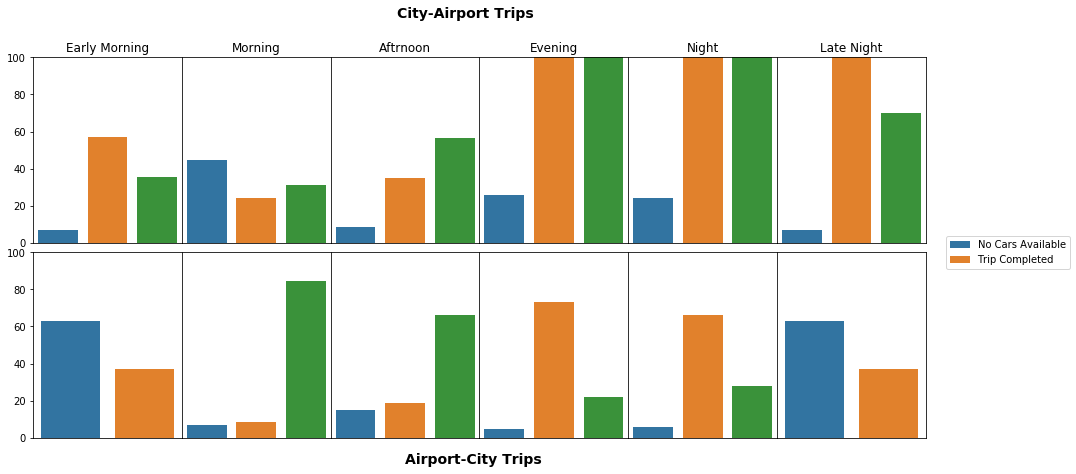

In [52]:
# Plotting data for each timeslot for City and Airport trips

f = plt.figure(figsize=(16,7))

## City Data

plt.suptitle('City-Airport Trips', fontsize=14, fontweight='bold')
plt.subplot(2,6,1)
a = sns.barplot(data=uber_data_early_morning_city_perc, x='Status', y='index')
a.set_ylim(0, 100)
# a.axis("off")
a.set_xticklabels([])
a.set_yticklabels([0,20,40,60,80,100])
a.set_xlabel('')
a.set_ylabel('')
a.set_xticks([])
a.set_yticks([0,20,40,60,80,100])
a.set_title('Early Morning')
plt.ylim([0,100])

plt.subplot(2,6,2)
b = sns.barplot(data=uber_data_morning_city_perc, x='Status', y='index')
b.set_ylim(0, 100)
# b.axis("off")
b.set_xticklabels([])
b.set_yticklabels([])
b.set_xlabel('')
b.set_ylabel('')
b.set_xticks([])
b.set_yticks([])
b.set_title('Morning')

plt.subplot(2,6,3)
c = sns.barplot(data=uber_data_afternoon_city_perc, x='Status', y='index')
c.set_ylim(0, 100)
# c.axis("off")
c.set_xticklabels([])
c.set_yticklabels([])
c.set_xlabel('')
c.set_ylabel('')
c.set_xticks([])
c.set_yticks([])
c.set_title('Aftrnoon')

plt.subplot(2,6,4)
d = sns.barplot(data=uber_data_evening_city_perc, x='Status', y='index')
d.set_ylim(0, 100)
# d.axis("off")
d.set_xticklabels([])
d.set_yticklabels([])
d.set_xlabel('')
d.set_ylabel('')
d.set_xticks([])
d.set_yticks([])
d.set_title('Evening')

plt.subplot(2,6,5)
e = sns.barplot(data=uber_data_night_city_perc, x='Status', y='index')
e.set_ylim(0, 100)
e.set_xticklabels([])
e.set_yticklabels([])
e.set_xlabel('')
e.set_ylabel('')
e.set_xticks([])
e.set_yticks([])
e.set_title('Night')

plt.subplot(2,6,6)
f = sns.barplot(data=uber_data_late_night_city_perc, x='Status', y='index')
f.set_ylim(0, 100)
f.set_xticklabels([])
f.set_yticklabels([])
f.set_xlabel('')
f.set_ylabel('')
f.set_xticks([])
f.set_yticks([])
f.set_title('Late Night')


## Airport-City Data

# plt.suptitle("Airport")
plt.subplot(2,6,7)
g = sns.barplot(data=uber_data_early_morning_airport_perc, x='Status', y='index')
g.set_ylim(100,0)
# g.axis("off")
g.set_xticklabels([])
g.set_yticklabels([100, 80, 60, 40, 20, 0])
g.set_xlabel('')
g.set_ylabel('')
g.set_xticks([])
g.set_yticks([100, 80, 60, 40, 20, 0])
# g.set_title('Early Morning')

plt.ylim([0,100])
plt.subplot(2,6,8)
h = sns.barplot(data=uber_data_morning_airport_perc, x='Status', y='index')
h.set_ylim(0, 100)
# h.axis("off")
h.set_xticklabels([])
h.set_yticklabels([])
h.set_xlabel('')
h.set_ylabel('')
h.set_xticks([])
h.set_yticks([])
# h.set_title('Morning')

plt.subplot(2,6,9)
i = sns.barplot(data=uber_data_afternoon_airport_perc, x='Status', y='index')
i.set_ylim(0, 100)
# i.axis("off")
i.set_xticklabels([])
i.set_yticklabels([])
i.set_xlabel('')
i.set_ylabel('')
i.set_xticks([])
i.set_yticks([])
# i.set_title('Afternoon')

plt.subplot(2,6,10)
j = sns.barplot(data=uber_data_evening_airport_perc, x='Status', y='index')
j.set_ylim(0, 100)
# j.axis("off")
j.set_xticklabels([])
j.set_yticklabels([])
j.set_xlabel('')
j.set_ylabel('')
j.set_xticks([])
j.set_yticks([])
# j.set_title('Evening')

plt.subplot(2,6,11)
k = sns.barplot(data=uber_data_night_airport_perc, x='Status', y='index')
k.set_ylim(0, 100)
k.set_xticklabels([])
k.set_yticklabels([])
k.set_xlabel('')
k.set_ylabel('')
k.set_xticks([])
k.set_yticks([])
# k.set_title('Night')

plt.subplot(2,6,12)
l = sns.barplot(data=uber_data_late_night_airport_perc, x='Status', y='index', hue='Status', dodge= False)
l.set_ylim(0, 100)
l.set_xticklabels([])
l.set_yticklabels([])
l.set_xlabel('')
l.set_ylabel('')
l.set_xticks([])
l.set_yticks([])

# l.legend(uber_data_night_airport_perc['Status'])
# l.set_title('Late Night')
# handles, labels = l.get_legend_handles_labels()
labels = ['Cancelled','No Cars Available', 'Trip Completed']
# plt.legend(handles, labels, loc='upper center')
l.legend(loc='center right', bbox_to_anchor=(2, 1), ncol=1)
plt.text(-5.5, -14, "Airport-City Trips", fontsize=14, fontweight='bold')
plt.subplots_adjust(wspace=0, hspace=0.05)

### Visualizing the most common problem faced by Uber

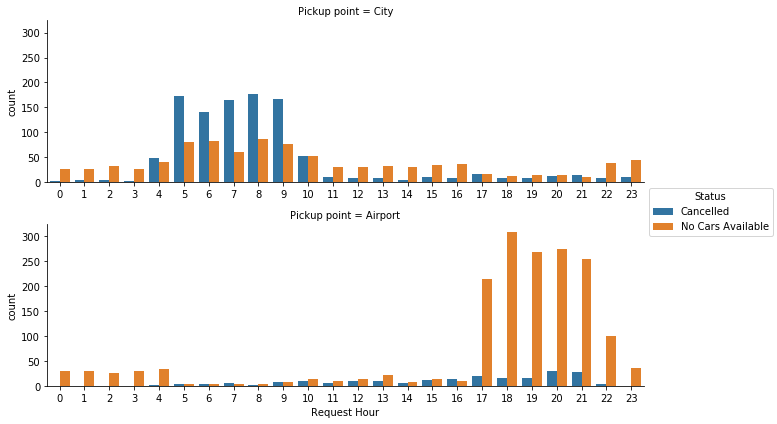

In [53]:
# Using factorplot since we have to visualize the spread of count of trips broken down by status of trip and pickup point
# plot hour w.r.t. status for different pickup points and identify the most pressing problems for Uber; Incomplete trips only
sns.factorplot(x = "Request Hour", hue = "Status", row = "Pickup point", data = uber_data[uber_data['Status']!='Trip Completed'], kind = "count", size=3, aspect=3)
plt.show()

Inference 1: Uber is facing cab 'Cancelled' issue in the morning from 5am to 10am in the city.

Inference 2: Uber is facing 'No Cars Available' from 12am to 4am in the night both in Airport and City. 

Inference 3: Uber is facing 'No Cars Available' from 5pm to 12am in Airport.

### Checking if the problem similar in all day

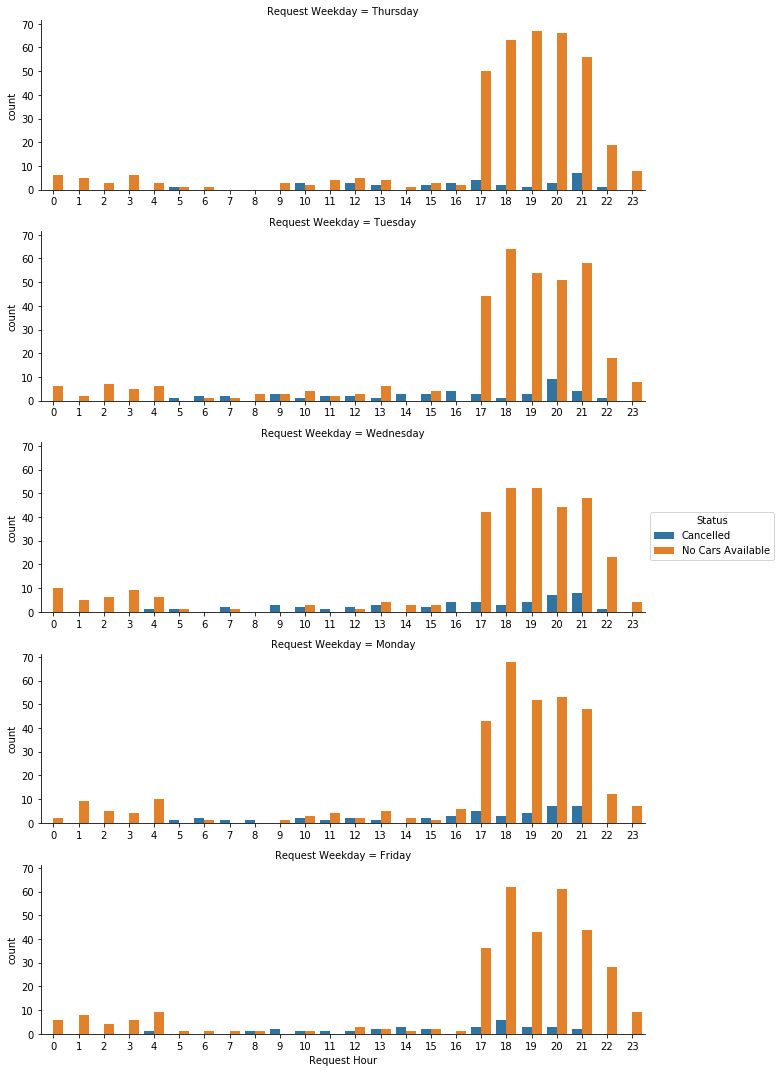

In [54]:
# Using factorplot since we have to visualize the spread of count of trips broken down by status of trip and pickup point
# factor plot of hour w.r.t. status for different pickup points; All trips
# Using factorplot since we have to visualize the spread of count of trips broken down by status of trip and day of week
# For pickup point Airport; Incomplete trips
# factor plot of hour and day of week w.r.t. status
sns.factorplot(data = uber_data[(uber_data['Pickup point']=="Airport")&(uber_data['Status']!='Trip Completed')], x = "Request Hour", hue = "Status", row = "Request Weekday", kind = "count", size=3, aspect=3)
plt.show()

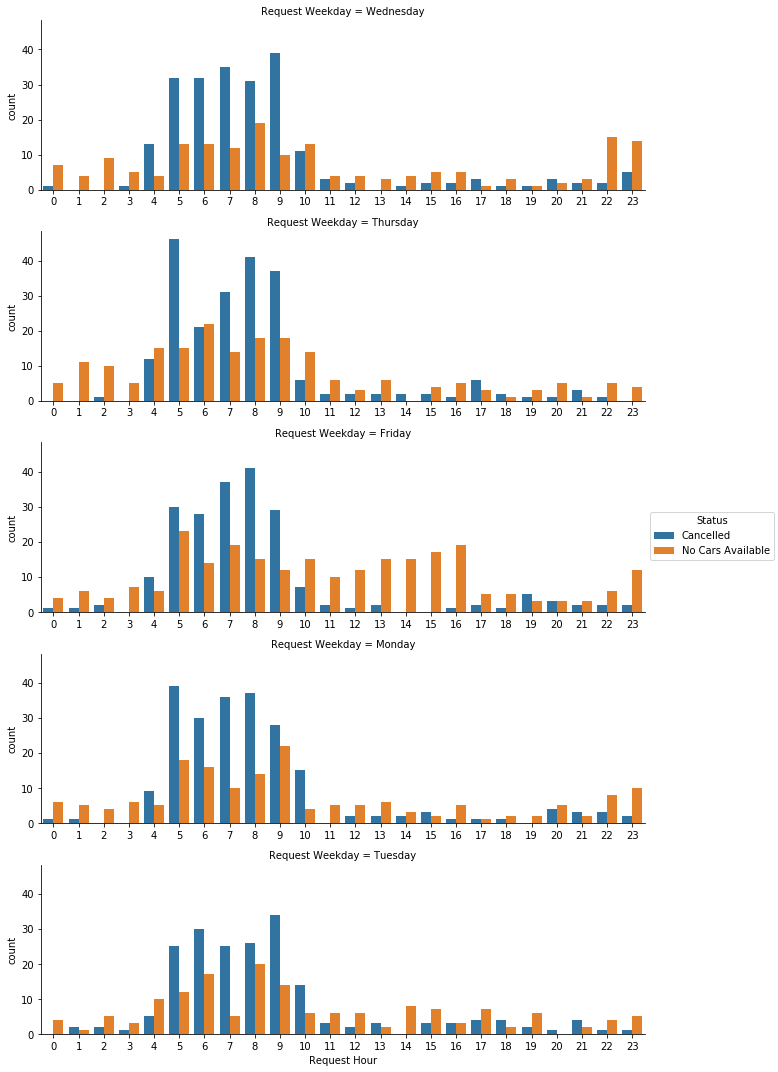

In [55]:
# Using factorplot since we have to visualize the spread of count of trips broken down by status of trip and day of week
# For pickup point City; Incomplete trips
# factor plot of hour and day of week w.r.t. status
sns.factorplot(data = uber_data[(uber_data['Pickup point']=="City")&(uber_data['Status']!='Trip Completed')], x = "Request Hour", hue = "Status", row = "Request Weekday",  kind = "count", size=3, aspect=3)
plt.show()

Inferance 4: Uber is facing similar problem across the week.

Inference 5: In Airport, demand is higher then supply during evening and night from 5pm to 12pm.

Inference 5: In City, demand is higher then supply during morning from 4am to 10 am.

### Analysing Issue

#### Univeriate and segmented analysis

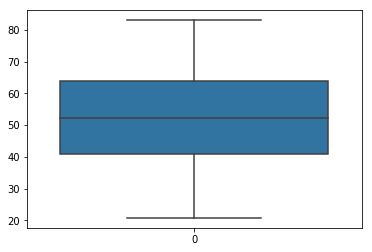

In [58]:
# Using Box plot since we have to visualize variation in one field
# Box plot for univariate analysis of 'Duration' field
sns.boxplot(data=uber_data[(uber_data['Duration']>0)]['Duration'])
plt.show()

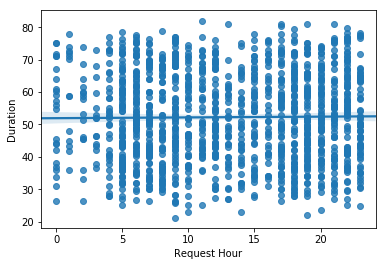

In [59]:
# For Airport to City rides
# Using scatterplot since we have to visualize corelation, if any.
# scatter plot of Request hour w.r.t. Duration
sns.regplot(data = uber_data[(uber_data['Duration']>0)&(uber_data['Pickup point']=='Airport')], x = "Request Hour", y = "Duration")
plt.show()

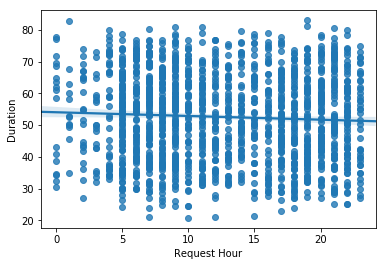

In [60]:
# For City to Airport rides
# Using scatterplot since we have to visualize corelation, if any.
# scatter plot of Request hour w.r.t. Duration
sns.regplot(data = uber_data[(uber_data['Duration']>0)&(uber_data['Pickup point']=='City')], x = "Request Hour", y = "Duration")
plt.show()

Inference 1: Ride duration is not much fluctuating for various slots and various rides either from airport to city or from city to airport, that means traffic conjession is not an issue causing factor.